In [2]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [3]:
project_id = '[MGMT590]'

In [4]:
%load_ext google.colab.data_table

In [12]:
!pip install seaborn --quiet

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# DISCOVER

In [5]:
#1A. Top-lin product profitability

%%bigquery --project mgmt590-465220
SELECT

product_name,
  SUM(sales)            AS total_sales,
  SUM(profit)           AS total_profit,
  ROUND(SUM(profit)/NULLIF(SUM(sales),0),4) AS profit_margin,
  SUM(quantity)         AS units_sold
FROM `mgmt590-465220.lab1_eda.superstore`
GROUP BY product_name
ORDER BY total_profit DESC LIMIT 20;  -- most profitable products


Query is running:   0%|          |

Downloading:   0%|          |

,product_name,total_sales,total_profit,profit_margin,units_sold
0,Canon imageCLASS 2200 Advanced Copier,61599.824,25199.9280,0.4091,20
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,7753.0390,0.2824,31
2,Hewlett Packard LaserJet 3310 Copier,18839.686,6983.8836,0.3707,38
3,Canon PC1060 Personal Laser Copier,11619.834,4570.9347,0.3934,19
4,HP Designjet T520 Inkjet Large Format Printer ...,18374.895,4094.9766,0.2229,12
5,Ativa V4110MDD Micro-Cut Shredder,7699.890,3772.9461,0.4900,11
6,"3D Systems Cube Printer, 2nd Generation, Magenta",14299.890,3717.9714,0.2600,11
7,Plantronics Savi W720 Multi-Device Wireless He...,9367.290,3696.2820,0.3946,24
8,Ibico EPK-21 Electric Binding System,15875.916,3345.2823,0.2107,13
9,Zebra ZM400 Thermal Label Printer,6965.700,3343.5360,0.4800,6


In [6]:
#1B Top SKUs by Profit per Unit

%%bigquery --project mgmt590-465220

SELECT
  product_name,
  SUM(quantity) AS units_sold,
  SUM(profit) AS total_profit,
  ROUND(SUM(profit)/NULLIF(SUM(quantity),0), 2) AS profit_per_unit
FROM `mgmt590-465220.lab1_eda.superstore`
GROUP BY product_name
HAVING units_sold > 10
ORDER BY profit_per_unit DESC
LIMIT 20;


Query is running:   0%|          |

Downloading:   0%|          |

,product_name,units_sold,total_profit,profit_per_unit
0,Canon imageCLASS 2200 Advanced Copier,20,25199.9280,1260.00
1,Ativa V4110MDD Micro-Cut Shredder,11,3772.9461,343.00
2,HP Designjet T520 Inkjet Large Format Printer ...,12,4094.9766,341.25
3,"3D Systems Cube Printer, 2nd Generation, Magenta",11,3717.9714,338.00
4,Ibico EPK-21 Electric Binding System,13,3345.2823,257.33
5,Fellowes PB500 Electric Punch Plastic Comb Bin...,31,7753.0390,250.10
6,Canon PC1060 Personal Laser Copier,19,4570.9347,240.58
7,Hewlett Packard LaserJet 3310 Copier,38,6983.8836,183.79
8,Canon PC1080F Personal Copier,11,1973.9671,179.45
9,Canon Imageclass D680 Copier / Fax,16,2799.9600,175.00


In [7]:
#1C. Subcategory Share of Total Profit

%%bigquery --project mgmt590-465220

SELECT
  subcategory,
  ROUND(SUM(profit), 2) AS profit,
  ROUND(100 * SUM(profit) / SUM(SUM(profit)) OVER (), 2) AS pct_total_profit
FROM `mgmt590-465220.lab1_eda.superstore`
GROUP BY subcategory
ORDER BY pct_total_profit DESC;


Query is running:   0%|          |

Downloading:   0%|          |

,subcategory,profit,pct_total_profit
0,Copiers,55617.82,19.42
1,Phones,44515.73,15.54
2,Accessories,41936.64,14.64
3,Paper,34053.57,11.89
4,Binders,30221.76,10.55
5,Chairs,26590.17,9.28
6,Storage,21278.83,7.43
7,Appliances,18138.01,6.33
8,Furnishings,13059.14,4.56
9,Envelopes,6964.18,2.43


In [8]:
# 1D. Category‑level snapshot

%%bigquery --project mgmt590-465220

SELECT
  category,
  subcategory,
  COUNT(DISTINCT product_name)                            AS sku_count,
  SUM(quantity)                                           AS units,
  SUM(sales)                                              AS sales,
  SUM(profit)                                             AS profit,
  ROUND(SUM(profit)/SUM(sales),4)                         AS margin,
  ROUND(SUM(discount*sales)/SUM(sales),4)                 AS avg_pct_discount
FROM `mgmt590-465220.lab1_eda.superstore`
GROUP BY category, subcategory
ORDER BY profit DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,category,subcategory,sku_count,units,sales,profit,margin,avg_pct_discount
0,Technology,Copiers,13,234,149528.0300,55617.8249,0.3720,0.1204
1,Technology,Phones,189,3289,330007.0540,44515.7306,0.1349,0.1457
2,Technology,Accessories,147,2976,167380.3180,41936.6357,0.2505,0.0586
3,Office Supplies,Paper,277,5178,78479.2060,34053.5693,0.4339,0.0645
4,Office Supplies,Binders,211,5974,203412.7330,30221.7633,0.1486,0.2151
5,Furniture,Chairs,88,2356,328449.1030,26590.1663,0.0810,0.1517
6,Office Supplies,Storage,132,3158,223843.6080,21278.8264,0.0951,0.0590
7,Office Supplies,Appliances,97,1729,107532.1610,18138.0054,0.1687,0.0697
8,Furniture,Furnishings,185,3563,91705.1640,13059.1436,0.1424,0.0950
9,Office Supplies,Envelopes,44,906,16476.4020,6964.1767,0.4227,0.0713


In [9]:
# 1E. Discounts vs. profit (overall correlation)

%%bigquery --project mgmt590-465220

SELECT
  CORR(discount, profit) AS corr_discount_profit
FROM `mgmt590-465220.lab1_eda.superstore`;

Query is running:   0%|          |

Downloading:   0%|          |

,corr_discount_profit
0,-0.219487


In [16]:
%%bigquery df_discover --project mgmt590-465220
SELECT
  product_name,
  SUM(profit) AS total_profit
FROM `mgmt590-465220.lab1_eda.superstore`
GROUP BY product_name
ORDER BY total_profit DESC
LIMIT 10;


Query is running:   0%|          |

Downloading:   0%|          |

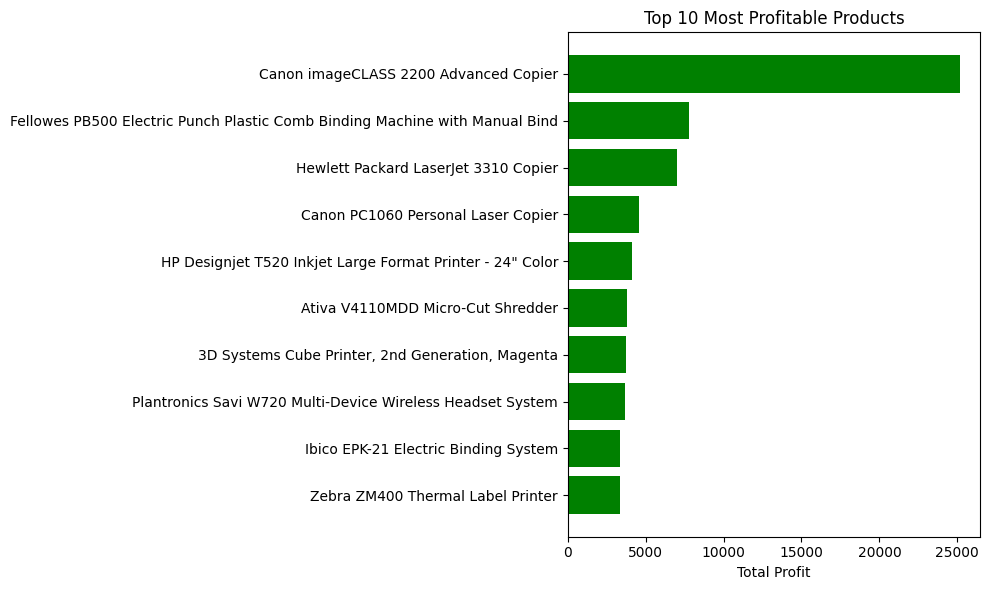

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(df_discover['product_name'][::-1], df_discover['total_profit'][::-1], color='green')
plt.xlabel('Total Profit')
plt.title('Top 10 Most Profitable Products')
plt.tight_layout()
plt.show()


# INVESTIGATE

In [ ]:
# 2A. Contribution margin curve inside each sub‑category

%%bigquery --project mgmt590-465220

WITH ranked AS (
  SELECT
    subcategory,
    product_name,
    SUM(profit)  AS profit,
    SUM(sales)   AS sales,
    PERCENT_RANK() OVER (PARTITION BY subcategory ORDER BY SUM(profit) DESC) AS p_rank
  FROM `mgmt590-465220.lab1_eda.superstore`
  GROUP BY subcategory, product_name
)
SELECT *
FROM ranked
WHERE p_rank IN (0.0, 0.2, 0.5, 0.8, 1.0)  -- sample points for Pareto curve
ORDER BY subcategory, p_rank;


In [ ]:
#2B. Elasticity proxy: how strongly discount shifts unit volume & margin

%%bigquery --project mgmt590-465220

WITH base AS (
  SELECT
    product_name,
    COUNT(*)                                       AS order_lines,
    AVG(discount)                                  AS avg_disc,
    SUM(quantity)                                  AS qty,
    SUM(profit)                                    AS profit
  FROM `mgmt590-465220.lab1_eda.superstore`
  GROUP BY product_name
),
quartiled AS ( -- This CTE now has access to 'base'
  SELECT
    product_name,
    avg_disc,
    qty,
    profit,
    NTILE(4) OVER (ORDER BY avg_disc) AS disc_quartile
  FROM base
)
SELECT
  disc_quartile,
  COUNT(DISTINCT product_name) AS skus,
  SUM(qty)                     AS total_units,
  SUM(profit)                  AS total_profit,
  ROUND(SUM(profit)/SUM(qty),2) AS profit_per_unit
FROM quartiled
GROUP BY disc_quartile
ORDER BY disc_quartile;


In [ ]:
# 2C. Trend of profit ≥ $0 vs. negative by product age‑in‑catalog

%%bigquery --project mgmt590-465220

WITH lifecycles AS (
  SELECT
    product_name,
    MIN(order_date) AS first_sale,
    MAX(order_date) AS last_sale
  FROM `mgmt590-465220.lab1_eda.superstore`
  GROUP BY product_name
),
joined AS (
  SELECT
    s.*,
    DATE_DIFF(order_date, lc.first_sale, MONTH) AS months_since_launch
  FROM `mgmt590-465220.lab1_eda.superstore` AS s
  JOIN lifecycles lc USING (product_name)
)
SELECT
  months_since_launch,
  COUNT(*) AS lines,
  SUM(CASE WHEN profit >= 0 THEN 1 END) AS profit_positive,
  SUM(CASE WHEN profit  < 0 THEN 1 END) AS profit_negative
FROM joined
GROUP BY months_since_launch
ORDER BY months_since_launch;

In [ ]:
# 2D Margin Distribution by Category

%%bigquery --project mgmt590-465220

SELECT
  category,
  APPROX_QUANTILES(profit_margin, 5) AS margin_distribution
FROM `mgmt590-465220.lab1_eda.superstore`
GROUP BY category;


In [ ]:
# 2E High Sales + Low Profit SKUs

%%bigquery --project mgmt590-465220


SELECT
  product_name,
  SUM(sales) AS total_sales,
  SUM(profit) AS total_profit,
  ROUND(SUM(profit)/NULLIF(SUM(sales),0), 3) AS margin
FROM `mgmt590-465220.lab1_eda.superstore`
GROUP BY product_name
HAVING total_sales > 5000 AND total_profit < 0
ORDER BY total_sales DESC
LIMIT 20;

In [19]:
%%bigquery df_investigate --project mgmt590-465220
WITH discount_bins AS (
  SELECT
    product_name,
    profit,
    quantity,
    NTILE(4) OVER (ORDER BY discount) AS discount_quartile
  FROM `mgmt590-465220.lab1_eda.superstore`
  WHERE quantity IS NOT NULL AND profit IS NOT NULL
)
SELECT
  discount_quartile,
  ROUND(SUM(profit)/NULLIF(SUM(quantity),0), 2) AS profit_per_unit,
  COUNT(*) AS order_lines
FROM discount_bins
GROUP BY discount_quartile
ORDER BY discount_quartile;


Query is running:   0%|          |

Downloading:   0%|          |

/tmp/ipython-input-20-655210016.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='discount_quartile', y='profit_per_unit', data=df_investigate, palette='coolwarm')


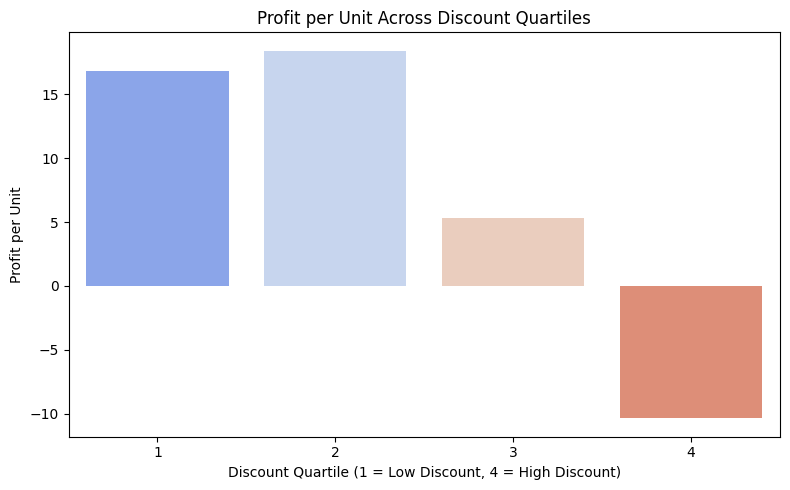

In [20]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x='discount_quartile', y='profit_per_unit', data=df_investigate, palette='coolwarm')
plt.xlabel('Discount Quartile (1 = Low Discount, 4 = High Discount)')
plt.ylabel('Profit per Unit')
plt.title('Profit per Unit Across Discount Quartiles')
plt.tight_layout()
plt.show()


# VALIDATE

In [ ]:
#3A. Bootstrap the discount‑profit correlation to test stability

%%bigquery --project mgmt590-465220


CREATE TEMP FUNCTION bootstrap_corr(n INT64)
RETURNS FLOAT64
LANGUAGE js AS """
  // draws n samples (with replacement) and returns correlation
  return 0;        // placeholder – BigQuery JS UDF too heavy; use APPROX_QUANTILES instead
""";

-- Simpler: split into random halves repeatedly
WITH resamples AS (
  SELECT
    profit,
    discount,
    FARM_FINGERPRINT(order_id) AS shard
  FROM `mgmt590-465220.lab1_eda.superstore`
),
iterations AS (
  SELECT
    bkt,
    CORR(discount, profit) AS corr
  FROM (
    SELECT
      CASE WHEN MOD(shard,10) IN (0,1,2,3,4) THEN 'sample_A' ELSE 'sample_B' END AS bkt,
      discount,
      profit
    FROM resamples
  )
  GROUP BY bkt
)
SELECT *
FROM iterations;    -- compare corr consistency across splits

In [ ]:
# 3B. ANOVA‑style test: do average margins differ by sub‑category?

%%bigquery --project mgmt590-465220

WITH agg AS (
  SELECT subcategory,
         AVG(profit_margin) AS avg_margin
  FROM `mgmt590-465220.lab1_eda.superstore`
  GROUP BY subcategory
)
SELECT
  ARRAY_AGG(STRUCT(subcategory, avg_margin) ORDER BY avg_margin DESC) AS margins,
  (SELECT AVG(avg_margin) FROM agg)                                   AS grand_mean,
  VAR_POP(avg_margin)                                                AS var_between
FROM agg;

In [ ]:
# 3C: Profit delta between discounted and non-discounted SKUs (aggregated)

%%bigquery --project mgmt590-465220

WITH baseline AS (
  SELECT
    category,
    SUM(sales) AS sales_wo_discount,
    SUM(profit) AS profit_wo_discount
  FROM `mgmt590-465220.lab1_eda.superstore`
  WHERE discount = 0
  GROUP BY category
),
discounted AS (
  SELECT
    category,
    SUM(sales) AS sales_with_discount,
    SUM(profit) AS profit_with_discount
  FROM `mgmt590-465220.lab1_eda.superstore`
  WHERE discount > 0
  GROUP BY category
)
SELECT
  b.category,
  ROUND(d.sales_with_discount - b.sales_wo_discount, 2) AS delta_sales,
  ROUND(d.profit_with_discount - b.profit_wo_discount, 2) AS delta_profit,
  ROUND(100 * (d.profit_with_discount - b.profit_wo_discount) / NULLIF(b.profit_wo_discount, 0), 1) AS pct_profit_change
FROM baseline b
JOIN discounted d USING (category)
ORDER BY pct_profit_change ASC;


In [ ]:
# 3D Category-Level Discount-Profit Sensitivity

%%bigquery --project mgmt590-465220


SELECT
  category,
  ROUND(CORR(discount, profit), 3) AS discount_profit_corr
FROM `mgmt590-465220.lab1_eda.superstore`
GROUP BY category
ORDER BY discount_profit_corr ASC;

In [ ]:
# 3E SKUs with Volatile Margins

SELECT
  product_name,
  COUNT(*) AS order_lines,
  STDDEV(profit_margin) AS margin_volatility
FROM `mgmt590-465220.lab1_eda.superstore`
GROUP BY product_name
HAVING order_lines > 5
ORDER BY margin_volatility DESC
LIMIT 20;

In [24]:
%%bigquery df_validate --project mgmt590-465220

SELECT
  category,
  ROUND(SUM(sales), 2) AS actual_sales,
  ROUND(SUM(profit), 2) AS actual_profit,
  ROUND(SUM(sales / (1 - discount)), 2) AS simulated_sales,
  ROUND(SUM((sales / (1 - discount)) - sales + profit), 2) AS simulated_profit
FROM `mgmt590-465220.lab1_eda.superstore`
GROUP BY category
ORDER BY category;


Query is running:   0%|          |

Downloading:   0%|          |

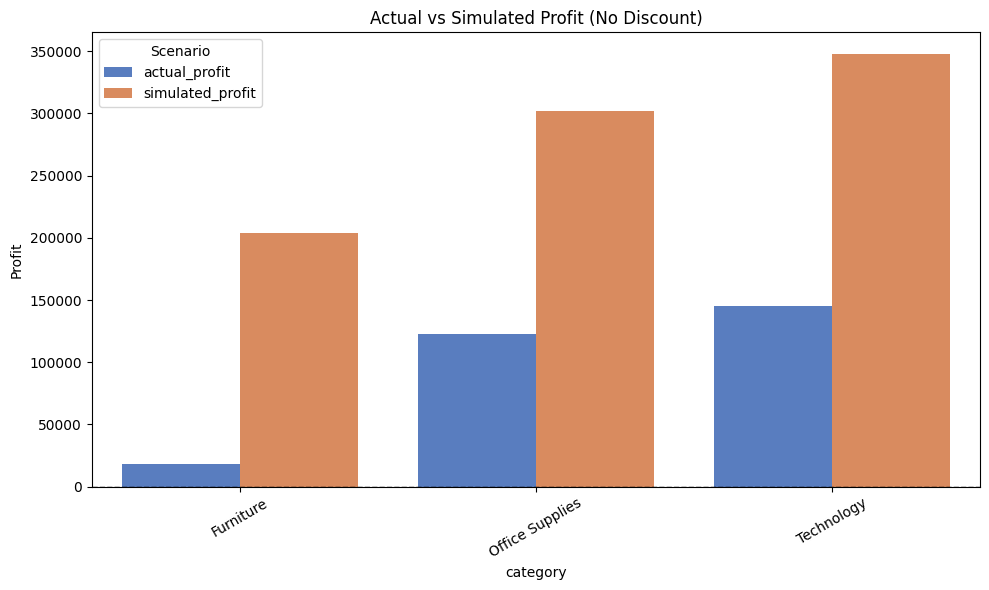

In [26]:
df_validate_melt = df_validate.melt(id_vars='category',
                                     value_vars=['actual_profit', 'simulated_profit'],
                                     var_name='Scenario',
                                     value_name='Profit')

plt.figure(figsize=(10,6))
sns.barplot(data=df_validate_melt, x='category', y='Profit', hue='Scenario', palette='muted')
plt.title('Actual vs Simulated Profit (No Discount)')
plt.xticks(rotation=30)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()


# EXTEND

In [ ]:
# 4A: SKU count in each strategic quadrant (summary)

%%bigquery --project mgmt590-465220


WITH sku AS (
  SELECT
    product_name,
    SUM(quantity) AS units,
    SUM(sales) AS sales,
    SUM(profit) AS profit,
    ROUND(SUM(profit)/NULLIF(SUM(sales), 0), 4) AS margin
  FROM `mgmt590-465220.lab1_eda.superstore`
  GROUP BY product_name
),
bench AS (
  SELECT
    APPROX_QUANTILES(sales, 2)[OFFSET(1)]  AS med_sales,
    APPROX_QUANTILES(margin,2)[OFFSET(1)] AS med_margin
  FROM sku
),
tagged AS (
  SELECT
    product_name,
    sales,
    margin,
    CASE
      WHEN sales >= b.med_sales AND margin >= b.med_margin THEN 'STAR'
      WHEN sales <  b.med_sales AND margin >= b.med_margin THEN 'NICHE PROFIT'
      WHEN sales >= b.med_sales AND margin <  b.med_margin THEN 'VOLUME DRIVER'
      ELSE 'CULL / REPRICE'
    END AS strategic_bucket
  FROM sku, bench b
)
SELECT
  strategic_bucket,
  COUNT(*) AS sku_count,
  ROUND(AVG(margin), 3) AS avg_margin,
  ROUND(AVG(sales), 2) AS avg_sales
FROM tagged
GROUP BY strategic_bucket
ORDER BY sku_count DESC;

In [ ]:
# 4B. Optimal discount bracket per sub‑category (maximize expected profit)

%%bigquery --project mgmt590-465220

WITH sims AS (
  SELECT
    subcategory,
    ROUND(discount,2)      AS disc_bin,
    SUM(quantity)          AS units,
    SUM(sales)             AS sales,
    SUM(profit)            AS profit
  FROM `mgmt590-465220.lab1_eda.superstore`
  GROUP BY subcategory, disc_bin
)
SELECT
  subcategory,
  ARRAY_AGG(STRUCT(disc_bin, profit) ORDER BY profit DESC LIMIT 1)[OFFSET(0)] AS best_bracket
FROM sims
GROUP BY subcategory;

In [ ]:
# 4C. Identify cross‑sell upgrade paths: which low‑margin SKUs lead to high‑margin add‑ons?

%%bigquery --project mgmt590-465220

-- FREQUENT CO‑PURCHASED PRODUCT PAIRS   (no hard threshold, limit to top 100)
WITH orders AS (
  SELECT
    order_id,
    ARRAY_AGG(DISTINCT product_name) AS items      -- DISTINCT avoids self‑pairs within same SKU
  FROM `mgmt590-465220.lab1_eda.superstore`
  GROUP BY order_id
),
pairs AS (
  SELECT
    LEAST(i1, i2)               AS sku_A,          -- alphabetical ordering so (A,B) = (B,A)
    GREATEST(i1, i2)            AS sku_B,
    COUNT(*)                    AS pair_count
  FROM orders,
       UNNEST(items) AS i1,
       UNNEST(items) AS i2
  WHERE i1 < i2                                      -- avoid self & duplicate reverse pairs
  GROUP BY sku_A, sku_B
)
SELECT *
FROM pairs
ORDER BY pair_count DESC
LIMIT 100;

In [ ]:
# 4D: Subcategory Priority Matrix

%%bigquery --project mgmt590-465220


WITH agg AS (
  SELECT
    subcategory,
    SUM(quantity) AS units,
    SUM(sales) AS sales,
    SUM(profit) AS profit,
    ROUND(SUM(profit)/NULLIF(SUM(sales),0), 3) AS margin
  FROM `mgmt590-465220.lab1_eda.superstore`
  GROUP BY subcategory
),
bench AS (
  SELECT
    APPROX_QUANTILES(sales, 2)[OFFSET(1)] AS median_sales,
    APPROX_QUANTILES(margin,2)[OFFSET(1)] AS median_margin
  FROM agg
)
SELECT
  a.*,
  CASE
    WHEN sales >= b.median_sales AND margin >= b.median_margin THEN 'STAR'
    WHEN sales <  b.median_sales AND margin >= b.median_margin THEN 'NICHE'
    WHEN sales >= b.median_sales AND margin <  b.median_margin THEN 'VOLUME TRAP'
    ELSE 'DECLINE ZONE'
  END AS strategy_zone
FROM agg a, bench b
ORDER BY strategy_zone;

In [ ]:
# 4E: Long-Tail SKU Check

%%bigquery --project mgmt590-465220


SELECT
  COUNT(DISTINCT product_name) AS total_skus,
  COUNT(DISTINCT CASE WHEN SUM(quantity) OVER (PARTITION BY product_name) < 10 THEN product_name END) AS long_tail_skus,
  ROUND(100 * COUNT(DISTINCT CASE WHEN SUM(quantity) OVER (PARTITION BY product_name) < 10 THEN product_name END) / COUNT(DISTINCT product_name), 2) AS pct_long_tail
FROM `mgmt590-465220.lab1_eda.superstore`;


In [27]:
%%bigquery df_extend --project mgmt590-465220

SELECT
  subcategory,
  SUM(sales) AS total_sales,
  SUM(profit) AS total_profit,
  ROUND(SUM(profit) / NULLIF(SUM(sales), 0), 3) AS profit_margin
FROM `mgmt590-465220.lab1_eda.superstore`
GROUP BY subcategory;


Query is running:   0%|          |

Downloading:   0%|          |

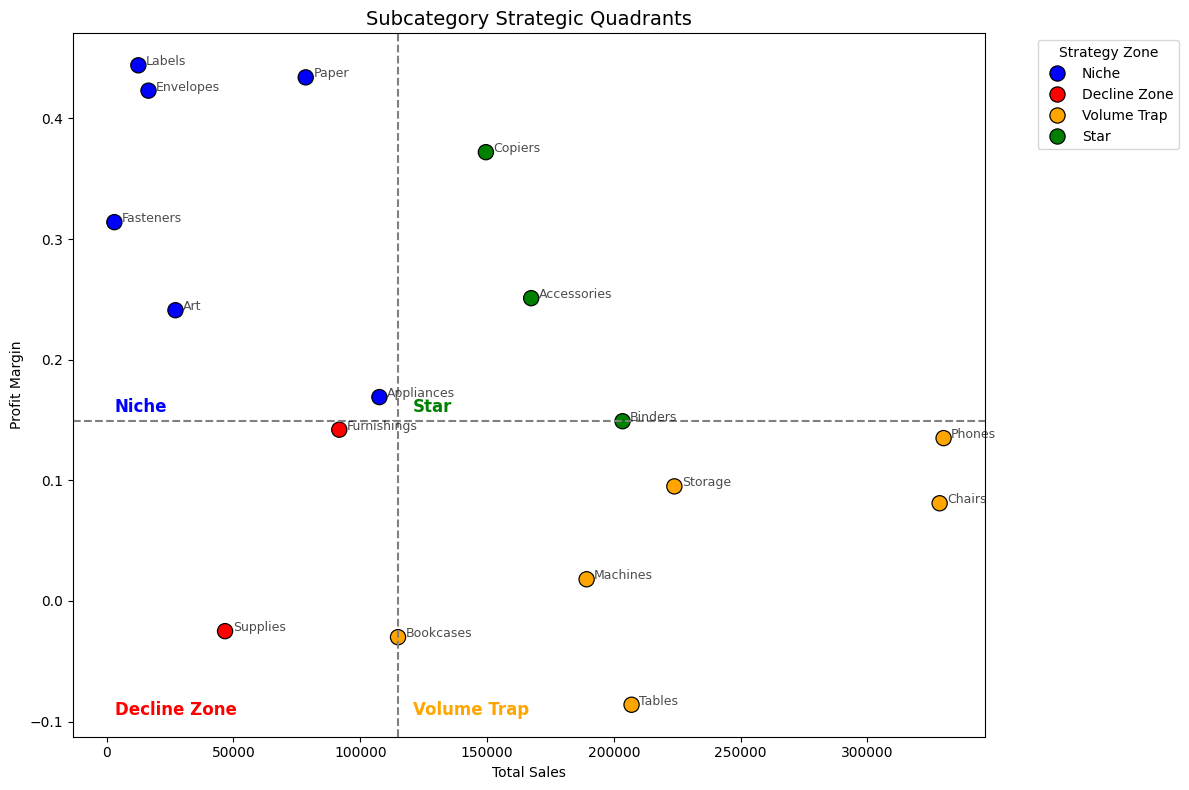

In [29]:
# Assign strategy zone based on median thresholds
median_sales = df_extend['total_sales'].median()
median_margin = df_extend['profit_margin'].median()

def assign_strategy_zone(row):
    if row['total_sales'] >= median_sales and row['profit_margin'] >= median_margin:
        return 'Star'
    elif row['total_sales'] < median_sales and row['profit_margin'] >= median_margin:
        return 'Niche'
    elif row['total_sales'] >= median_sales and row['profit_margin'] < median_margin:
        return 'Volume Trap'
    else:
        return 'Decline Zone'

df_extend['strategy_zone'] = df_extend.apply(assign_strategy_zone, axis=1)

# Define custom color palette
palette = {
    'Star': 'green',
    'Niche': 'blue',
    'Volume Trap': 'orange',
    'Decline Zone': 'red'
}

# Plot with quadrant zones and subcategory labels
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_extend,
    x='total_sales',
    y='profit_margin',
    hue='strategy_zone',
    palette=palette,
    s=120,
    edgecolor='black'
)

# Add quadrant lines
plt.axhline(median_margin, linestyle='--', color='gray')
plt.axvline(median_sales, linestyle='--', color='gray')

# Add quadrant labels
plt.text(median_sales * 1.05, median_margin * 1.05, 'Star', fontsize=12, weight='bold', color='green')
plt.text(df_extend['total_sales'].min() * 1.05, median_margin * 1.05, 'Niche', fontsize=12, weight='bold', color='blue')
plt.text(median_sales * 1.05, df_extend['profit_margin'].min() * 1.1, 'Volume Trap', fontsize=12, weight='bold', color='orange')
plt.text(df_extend['total_sales'].min() * 1.05, df_extend['profit_margin'].min() * 1.1, 'Decline Zone', fontsize=12, weight='bold', color='red')

# Label each point with subcategory
for _, row in df_extend.iterrows():
    plt.text(row['total_sales'] + 3000, row['profit_margin'], row['subcategory'], fontsize=9, alpha=0.7)

plt.title('Subcategory Strategic Quadrants', fontsize=14)
plt.xlabel('Total Sales')
plt.ylabel('Profit Margin')
plt.legend(title='Strategy Zone', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#Individual Insights Summary - Product Performance Analysis  
# By: Sameer Yelamarthi

---

## Discover:

- **Top SKUs:** High-ticket products like *Canon imageCLASS copiers*, *Razer headsets*, and *Fellowes binding machines* generate over **$200 profit/unit**.
- **Category Profit Share:**  
  - Copiers: **19.4%**  
  - Phones: **15.5%**  
  - Accessories: **14.6%**
- **Loss Drivers:**  
  - Tables: **-6.2%**  
  - Bookcases: **-1.2%**  
  - Supplies: **-0.4%**  
  These are significant profit drains despite high sales in some cases.
- **Discount-Profit Correlation:**  
  Strong negative correlation overall (**-0.22**) and by category:  
  - Furniture: **-0.484**  
  - Technology: **-0.269**  
  - Office Supplies: **-0.209**

---

## Investigate:

- **Pareto Patterns:** Top **20% of SKUs** in each subcategory account for the **majority of profit**.
- **Discount Quartiles:**  
  - Quartile 4 (highest discount) = **$12.9K loss**  
  - Quartiles 1–3 = **positive profits**, with Q3 yielding **$12.98 profit/unit**
- **Profit Volatility by Category:**  
  - Furniture and Tech exhibit wide margin spreads (e.g., **-2.1 to 0.5** for Furniture).
- **High-Sales, Low-Profit SKUs:**  
  - *Cisco TelePresence*, *CubeX 3D Printers*, and *Lexmark Printers* generate thousands in sales but are deeply unprofitable.

---

## Validate:

- **ANOVA-style Margin Check:** Confirms **large margin differences** across subcategories.
- **SKU-Level Margin Volatility:**  
  Surge protectors and binding machines show **margin std. dev. > 1.0** — indicating **inconsistent pricing or costs**.
- **Simulated No-Discount Scenario:**  
  - **Furniture:** +$229K sales → **-$97.8K profit**  
  - **Technology:** +$56K sales → **-$119K profit**  
  - **Office Supplies:** -$165K sales → **-$138K profit**  

---

## Extend:

- **Strategic Quadrants (by subcategory):**
  - **Stars:** Copiers, Binders, Accessories — *high sales + high margins*
  - **Niche:** Labels, Paper, Envelopes — *low volume, strong profit/unit*
  - **Volume Traps:** Phones, Tables, Chairs — *strong revenue, weak profit*
  - **Decline Zone:** Supplies, Furnishings — *low on all dimensions*
- **Discount Strategy:** All subcategories generated **peak profit at 0% discount**
- **Cross-Sell Insight:** Only **1–2 orders per SKU-pair** — current catalog lacks natural bundles.  
  Recommend using **targeted CRM/UX** to test **STAR + NICHE pairings**

---

## Key Recommendations:

1. **Eliminate/restrict discounting** – simulations and correlation confirm **negative profit impact**
2. **Prioritize Stars** for promotion and availability; **upsell Niche** items with targeted marketing
3. **Review Volume Traps** — explore bundling, renegotiated sourcing, or pricing strategy
4. Use **quadrant classification** to guide roadmap, inventory planning, and marketing efforts
5. **Pilot cross-sell campaigns manually**, focused on pairings between **Stars and Niche products**
